# Beer Recipe Exploratory Analysis
### By- Aarush Kumar
#### Dated: November 22,2021

In [1]:
from IPython.display import Image
Image(url='https://wallpapercave.com/wp/wp3087031.jpg')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
beer_recipe = pd.read_csv('/home/aarush100616/Downloads/Projects/Beer Recipe/Data/recipeData.csv', index_col='BeerID', encoding='latin1')
beer_recipe.head()

Name  \
BeerID                                    
1                     Vanilla Cream Ale   
2           Southern Tier Pumking clone   
3           Zombie Dust Clone - EXTRACT   
4         Zombie Dust Clone - ALL GRAIN   
5       Bakke Brygg Belgisk Blonde 50 l   

                                                      URL  \
BeerID                                                      
1            /homebrew/recipe/view/1633/vanilla-cream-ale   
2       /homebrew/recipe/view/16367/southern-tier-pumk...   
3       /homebrew/recipe/view/5920/zombie-dust-clone-e...   
4       /homebrew/recipe/view/5916/zombie-dust-clone-a...   
5       /homebrew/recipe/view/89534/bakke-brygg-belgis...   

                                     Style  StyleID  Size(L)     OG     FG  \
BeerID                                                                       
1                                Cream Ale       45    21.77  1.055  1.013   
2       Holiday/Winter Special Spiced Beer       85    20.82  1.083  1.021   
3                             American IPA        7    18.93  1.063  1.018   
4                             American IPA        7    22.71  1.061  1.017   
5                        Belgian Blond Ale       20    50.00  1.060  1.010   

         ABV    IBU  Color  ...  BoilTime  BoilGravity  Efficiency  \
BeerID                      ...                                      
1       5.48  17.65   4.83  ...        75        1.038        70.0   
2       8.16  60.65  15.64  ...        60        1.070        70.0   
3       5.91  59.25   8.98  ...        60          NaN        70.0   
4       5.80  54.48   8.50  ...        60          NaN        70.0   
5       6.48  17.84   4.57  ...        90        1.050        72.0   

        MashThickness        SugarScale BrewMethod PitchRate  PrimaryTemp  \
BeerID                                                                      
1                 NaN  Specific Gravity  All Grain       NaN        17.78   
2                 NaN  Specific Gravity  All Grain       NaN          NaN   
3                 NaN  Specific Gravity    extract       NaN          NaN   
4                 NaN  Specific Gravity  All Grain       NaN          NaN   
5                 NaN  Specific Gravity  All Grain       NaN        19.00   

        PrimingMethod   PrimingAmount  
BeerID                                 
1          corn sugar          4.5 oz  
2                 NaN             NaN  
3                 NaN             NaN  
4                 NaN             NaN  
5          Sukkerlake  6-7 g sukker/l  

[5 rows x 21 columns]

In [4]:
print(beer_recipe.info(verbose=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Columns: 21 entries, Name to PrimingAmount
dtypes: float64(12), int64(2), object(7)
memory usage: 12.4+ MB
None


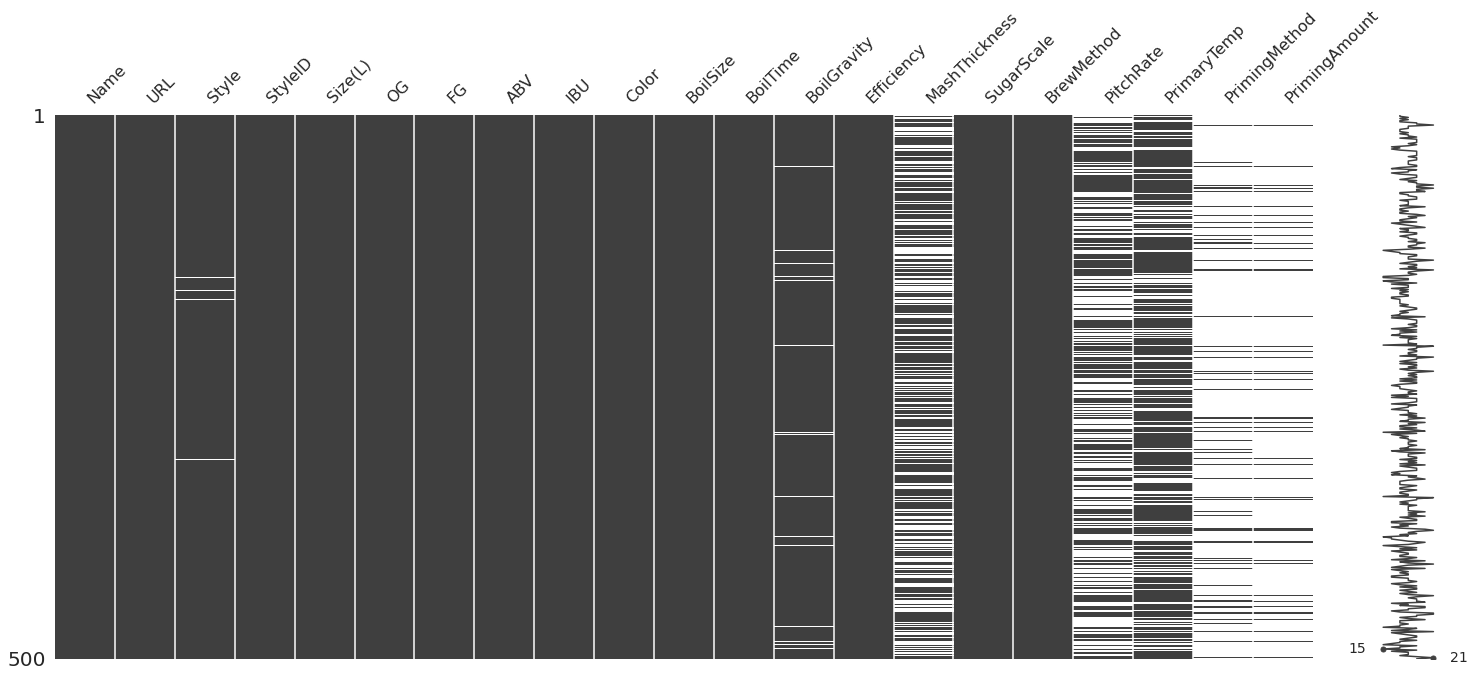

In [5]:
%matplotlib inline
msno.matrix(beer_recipe.sample(500))

In [6]:
null_priming = beer_recipe['PrimingMethod'].isnull()
print('Priming Method is null on {} rows out of {}, so {} % of the time'.format(null_priming.sum(), len(beer_recipe), round((null_priming.sum()/len(beer_recipe))*100,2)))

Priming Method is null on 67095 rows out of 73861, so 90.84 % of the time


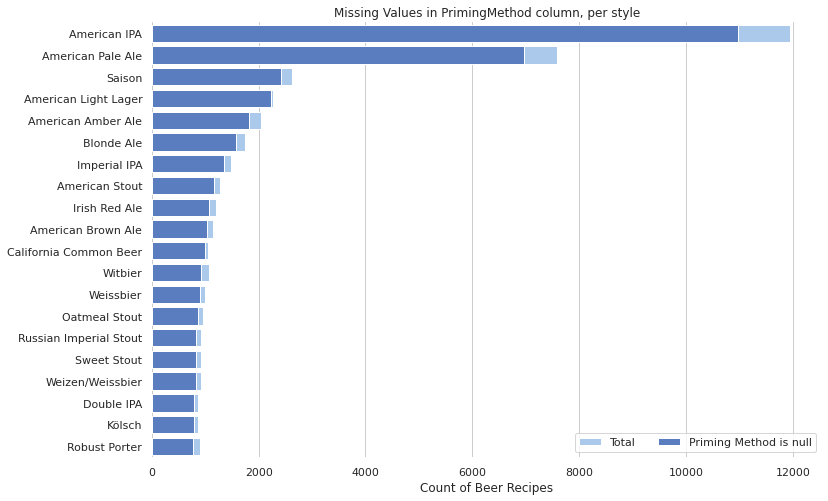

In [7]:
style_cnt = beer_recipe.loc[:,['Style','PrimingMethod']]
style_cnt['NullPriming'] = style_cnt['PrimingMethod'].isnull()
style_cnt['Count'] = 1
style_cnt_grp = style_cnt.loc[:,['Style','Count','NullPriming']].groupby('Style').sum()

style_cnt_grp = style_cnt_grp.sort_values('NullPriming', ascending=False)
style_cnt_grp.reset_index(inplace=True)

def stacked_bar_plot(df, x_total, x_sub_total, sub_total_label, y):
    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the total
    sns.set_color_codes("pastel")
    sns.barplot(x=x_total, y=y, data=df, label="Total", color="b")

    # Plot
    sns.set_color_codes("muted")
    sns.barplot(x=x_sub_total, y=y, data=df, label=sub_total_label, color="b")
    
    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)
    sns.despine(left=True, bottom=True)
    
    return f, ax
    
f, ax = stacked_bar_plot(style_cnt_grp[:20], 'Count', 'NullPriming', 'Priming Method is null', 'Style')
ax.set(title='Missing Values in PrimingMethod column, per style', ylabel='', xlabel='Count of Beer Recipes')
sns.despine(left=True, bottom=True)

In [8]:
print( list(beer_recipe.select_dtypes(include=object).columns))

['Name', 'URL', 'Style', 'SugarScale', 'BrewMethod', 'PrimingMethod', 'PrimingAmount']


In [9]:
print(beer_recipe.PrimingAmount.unique())

['4.5 oz' nan '6-7 g sukker/l' ...
 '4.79oz for 6gal  4.5oz for 5.75  4.32 for 5.5gal  4.12oz for 5.25gal  3.93oz for 5 gal.'
 '13.5' '7 gram / liter']


SugarScale has 0 null values


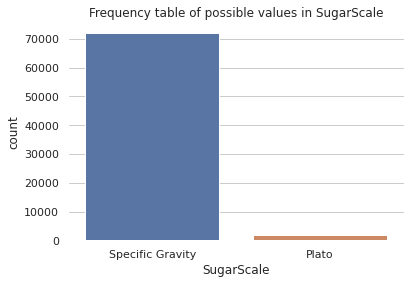

In [10]:
ax = sns.countplot(x='SugarScale', data=beer_recipe)
ax.set(title='Frequency table of possible values in SugarScale')
sns.despine(left=True, bottom=True)
print('SugarScale has {} null values'.format(beer_recipe.SugarScale.isnull().sum()))

BrewMethod has 0 null values


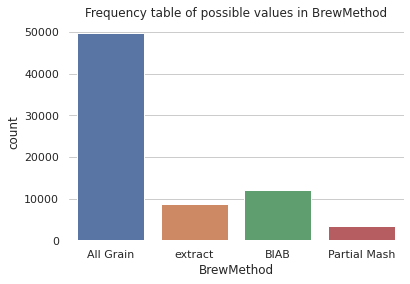

In [11]:
ax = sns.countplot(x='BrewMethod', data=beer_recipe)
ax.set(title='Frequency table of possible values in BrewMethod')
sns.despine(left=True, bottom=True)
print('BrewMethod has {} null values'.format(beer_recipe.BrewMethod.isnull().sum()))

In [12]:
print('PrimingMethod has {} unique values'.format(beer_recipe.PrimingMethod.nunique()))
print(beer_recipe.PrimingMethod.unique()[:20])

PrimingMethod has 874 unique values
['corn sugar' nan 'Sukkerlake' 'Corn Sugar' 'Priming Sugar'
 'Keg - Force Carb.' 'Force Carb' 'Force carb' 'Forced Carbonation'
 'DME boiled in 2 cups water' 'force carb' 'Dextrose' 'Sukker' 'Sugar'
 'FORCED CARB' 'Inverted sugar' 'honey' 'CO2' 'Add in last 5 of boil'
 'priming sugar']


In [13]:
print( list( beer_recipe.select_dtypes(exclude=object)))

['StyleID', 'Size(L)', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity', 'Efficiency', 'MashThickness', 'PitchRate', 'PrimaryTemp']


In [14]:
def get_sg_from_plato(plato):
    sg = 1 + (plato / (258.6 - ( (plato/258.2) *227.1) ) )
    return sg

beer_recipe['OG_sg'] = beer_recipe.apply(lambda row: get_sg_from_plato(row['OG']) if row['SugarScale'] == 'Plato' else row['OG'], axis=1)
beer_recipe['FG_sg'] = beer_recipe.apply(lambda row: get_sg_from_plato(row['FG']) if row['SugarScale'] == 'Plato' else row['FG'], axis=1)
beer_recipe['BoilGravity_sg'] = beer_recipe.apply(lambda row: get_sg_from_plato(row['BoilGravity']) if row['SugarScale'] == 'Plato' else row['BoilGravity'], axis=1)

In [15]:
num_feats_list = ['Size(L)', 'OG_sg', 'FG_sg', 'ABV', 'IBU', 'Color', 'BoilSize', 'BoilTime', 'BoilGravity_sg', 'Efficiency', 'MashThickness', 'PitchRate', 'PrimaryTemp']
beer_recipe.loc[:, num_feats_list].describe().T

count       mean         std     min     25%     50%  \
Size(L)         73861.0  43.929775  180.373492   1.000  18.930  20.820   
OG_sg           73861.0   1.060846    0.057580   1.000   1.050   1.057   
FG_sg           73861.0   1.013976    0.012187   0.991   1.011   1.013   
ABV             73861.0   6.136865    1.883510   0.000   5.080   5.790   
IBU             73861.0  44.276186   42.945508   0.000  23.370  35.770   
Color           73861.0  13.404989   11.944511   0.000   5.170   8.440   
BoilSize        73861.0  49.724919  193.246427   1.000  20.820  27.440   
BoilTime        73861.0  65.074870   15.024228   0.000  60.000  60.000   
BoilGravity_sg  70871.0   1.053498    0.027301   1.000   1.040   1.047   
Efficiency      73861.0  66.354881   14.091686   0.000  65.000  70.000   
MashThickness   43997.0   2.127235    1.682347   0.000   1.500   1.500   
PitchRate       34609.0   0.750468    0.394262   0.000   0.350   0.750   
PrimaryTemp     51199.0  19.175641    4.219676 -17.780  18.000  20.000   

                   75%       max  
Size(L)         23.660  9200.000  
OG_sg            1.067    15.897  
FG_sg            1.016     3.974  
ABV              6.830    54.720  
IBU             56.380  3409.300  
Color           16.790   186.000  
BoilSize        30.000  9700.000  
BoilTime        60.000   240.000  
BoilGravity_sg   1.058     1.500  
Efficiency      75.000   100.000  
MashThickness    3.000   100.000  
PitchRate        1.000     2.000  
PrimaryTemp     20.000   114.000

In [16]:
vlow_scale_feats = ['OG_sg', 'FG_sg', 'BoilGravity_sg', 'PitchRate']
low_scale_feats = ['ABV', 'MashThickness']
mid_scale_feats = ['Color', 'BoilTime', 'Efficiency', 'PrimaryTemp']
high_scale_feats = ['IBU', 'Size(L)',  'BoilSize']

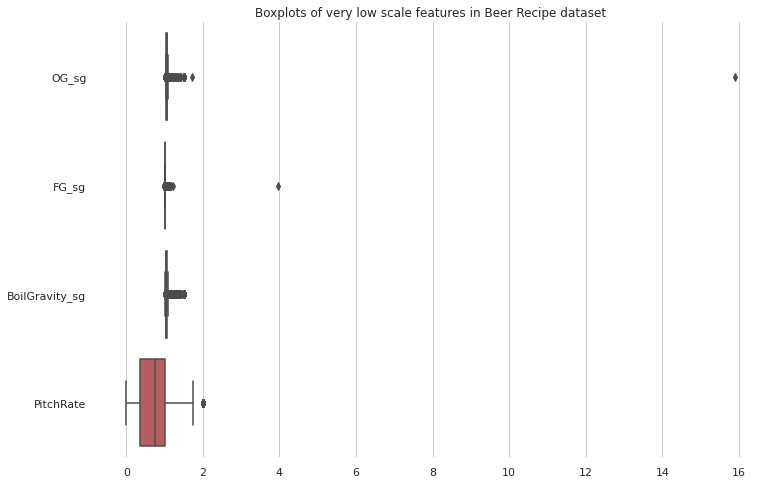

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=beer_recipe.loc[:, vlow_scale_feats], orient='h')
ax.set(title='Boxplots of very low scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

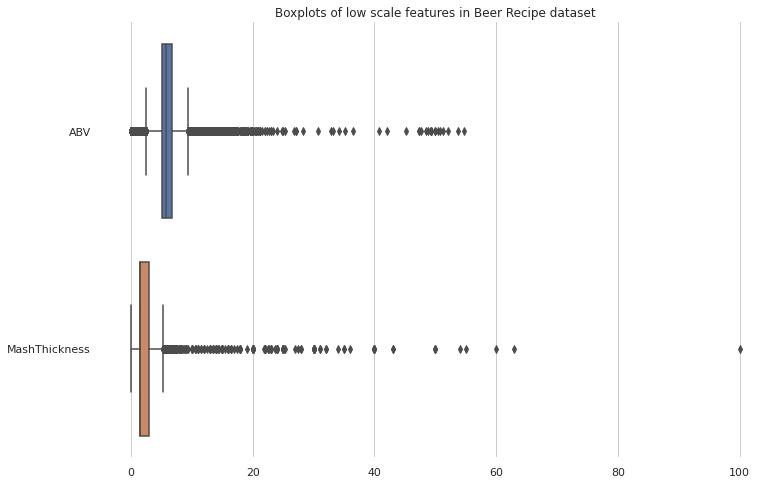

In [18]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=beer_recipe.loc[:, low_scale_feats], orient='h')
ax.set(title='Boxplots of low scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

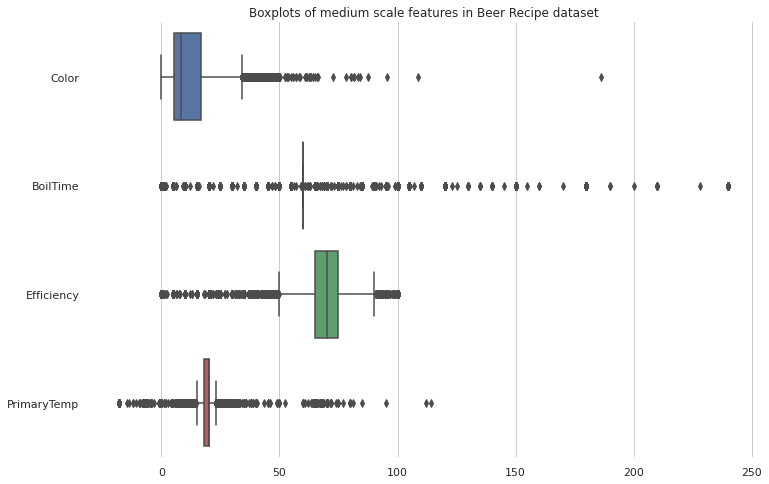

In [19]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=beer_recipe.loc[:, mid_scale_feats], orient='h')
ax.set(title='Boxplots of medium scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

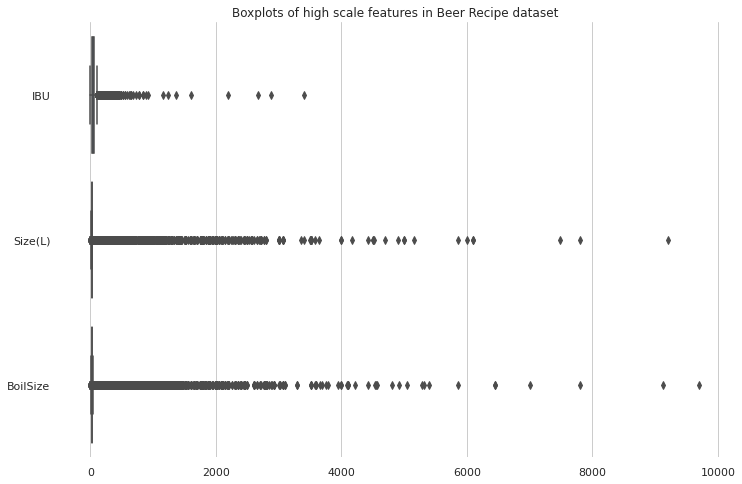

In [20]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(data=beer_recipe.loc[:, high_scale_feats], orient='h')
ax.set(title='Boxplots of high scale features in Beer Recipe dataset')
sns.despine(left=True, bottom=True)

### Class Imbalance

In [21]:
print('There are {} different styles of beer'.format(beer_recipe.StyleID.nunique()))

There are 176 different styles of beer


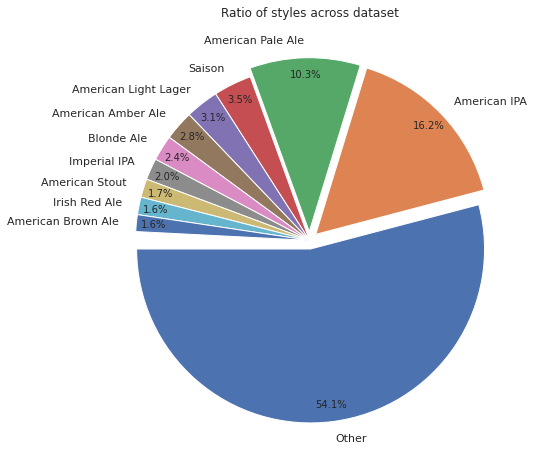

In [22]:
# Get top10 styles
top10_style = list(style_cnt_grp['Style'][:10].values)
# Group by current count information computed earlier and group every style not in top20 together
style_cnt_other = style_cnt_grp.loc[:, ['Style','Count']]
style_cnt_other.Style = style_cnt_grp.Style.apply(lambda x: x if x in top10_style else 'Other')
style_cnt_other = style_cnt_other.groupby('Style').sum()
# Get ratio of each style
style_cnt_other['Ratio'] = style_cnt_other.Count.apply(lambda x: x/float(len(beer_recipe)))
style_cnt_other = style_cnt_other.sort_values('Count', ascending=False)
f, ax = plt.subplots(figsize=(8, 8))
explode = (0.05, 0.05, 0.05, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(x=style_cnt_other['Ratio'], labels=list(style_cnt_other.index), startangle = 180, autopct='%1.1f%%', pctdistance= .9, explode=explode)
plt.title('Ratio of styles across dataset')
plt.show()

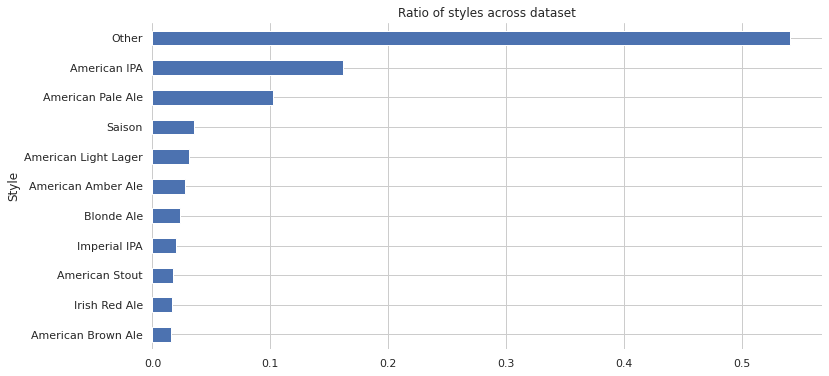

In [23]:
#plt.barh(list(style_cnt_other.index), style_cnt_other['Count'])
style_cnt_other['Ratio'].plot(kind='barh', figsize=(12,6),)
plt.title('Ratio of styles across dataset')
sns.despine(left=True, bottom=True)
plt.gca().invert_yaxis()

### Correlations

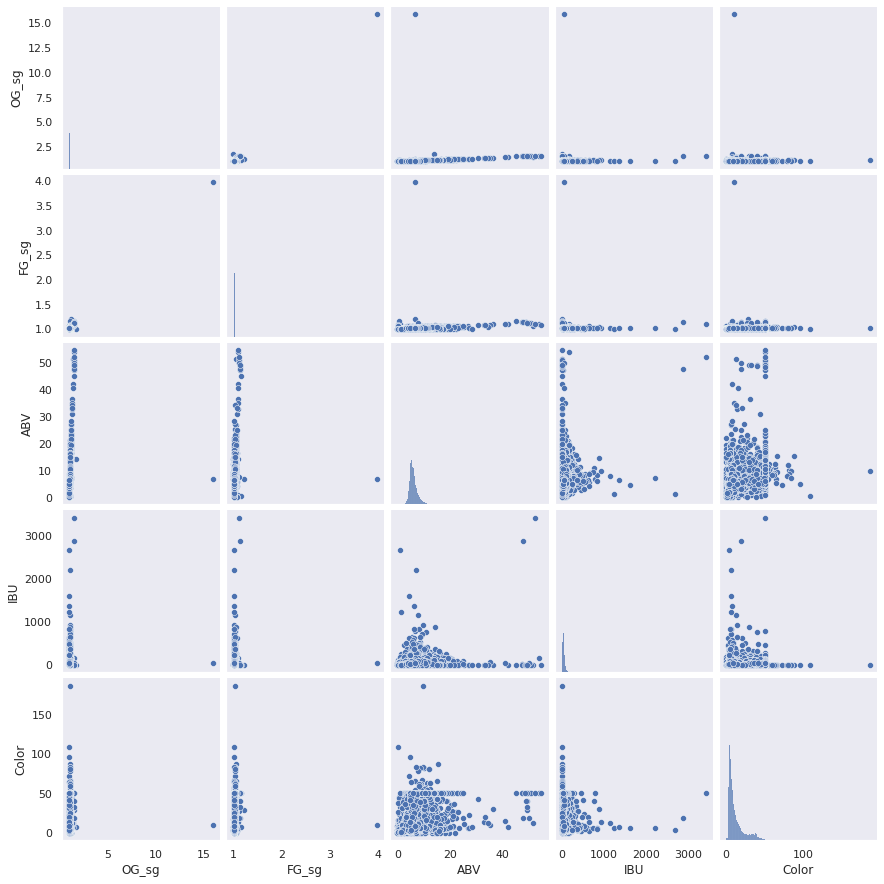

In [24]:
# create specific df that only contains the fields we're interested in
pairplot_df = beer_recipe.loc[:, ['Style','OG_sg','FG_sg','ABV','IBU','Color']]

# create the pairplot
sns.set(style="dark")
sns.pairplot(data=pairplot_df)
plt.show()

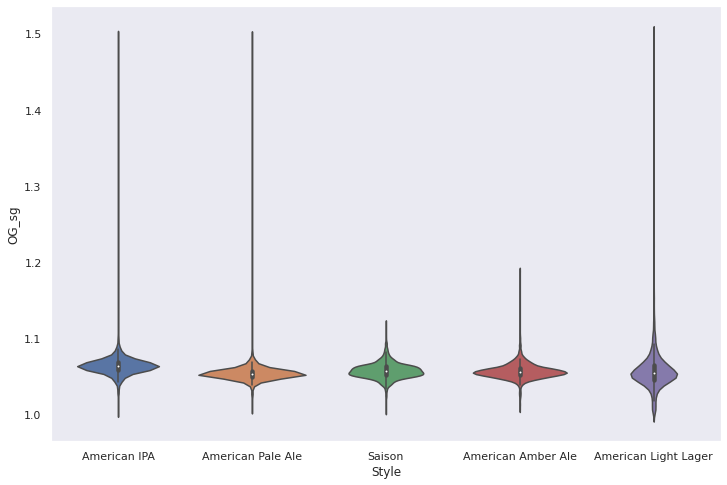

In [25]:
style_cnt_grp = style_cnt_grp.sort_values('Count', ascending=False)
top5_style = list(style_cnt_grp['Style'][:5].values)
top5_style_df = pairplot_df[pairplot_df['Style'].isin(top5_style)]
f, ax = plt.subplots(figsize=(12, 8))
sns.violinplot(x='Style', y='OG_sg',data=top5_style_df)
plt.show()

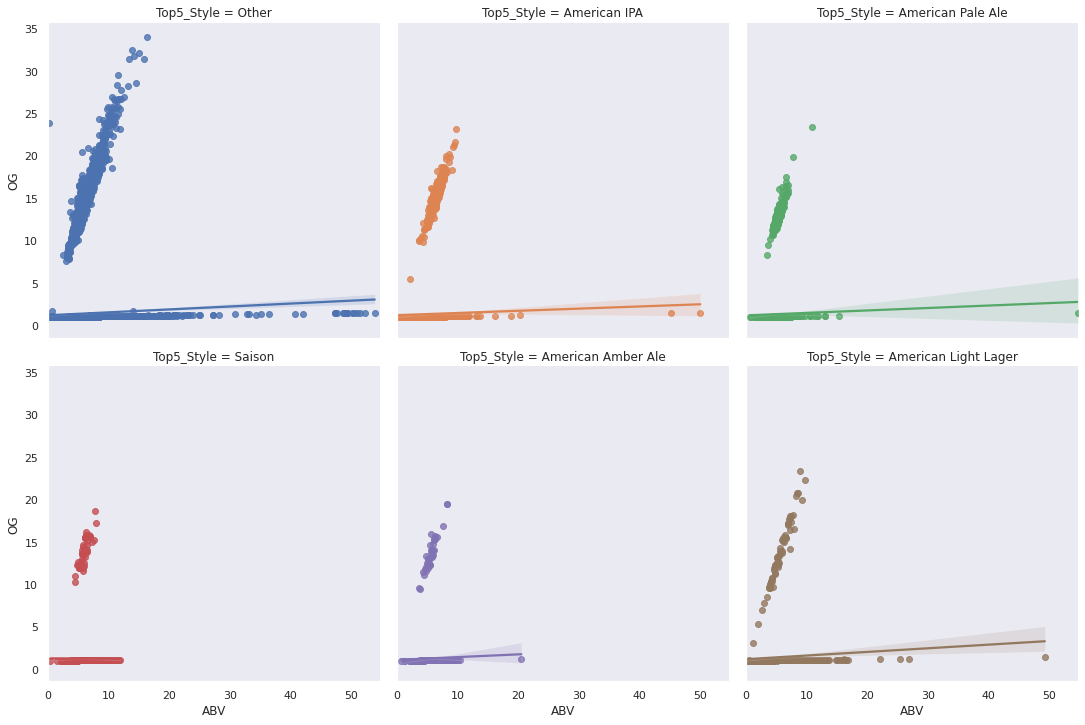

In [26]:
# Get Top5 styles
top5_style = list(style_cnt_grp['Style'][:5].values)
beer_recipe['Top5_Style'] = beer_recipe.Style.apply(lambda x: x if x in top5_style else 'Other')
# Create Reg plot
sns.lmplot(x='ABV', y='OG', hue='Top5_Style', col='Top5_Style', col_wrap=3, data=beer_recipe, n_boot=100)

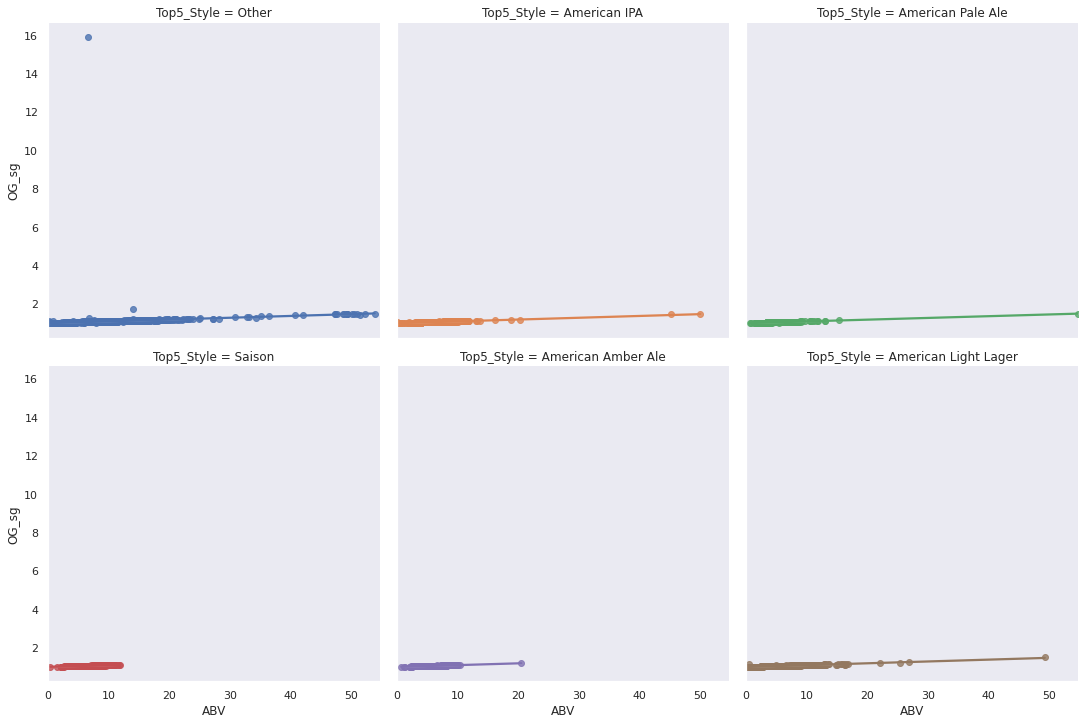

In [27]:
# Create Reg plot
sns.lmplot(x='ABV', y='OG_sg', hue='Top5_Style', col='Top5_Style', col_wrap=3, data=beer_recipe, n_boot=100)

In [28]:
# imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Get only the features to be used from original dataset
features_list= ['StyleID', #target
                'OG_sg','FG_sg','ABV','IBU','Color', #standardized fields
                'SugarScale', 'BrewMethod', #categorical features
                'Size(L)', 'BoilSize', 'BoilTime', 'BoilGravity_sg', 'Efficiency', 'MashThickness', 'PitchRate', 'PrimaryTemp' # other numerical features
                ]

clf_data = beer_recipe.loc[:, features_list]
# Label encoding
cat_feats_to_use = list(clf_data.select_dtypes(include=object).columns)
for feat in cat_feats_to_use:
    encoder = LabelEncoder()
    clf_data[feat] = encoder.fit_transform(clf_data[feat])
# Fill null values
num_feats_to_use = list(clf_data.select_dtypes(exclude=object).columns)
for feat in num_feats_to_use:
    imputer = SimpleImputer(strategy='median')
    clf_data[feat] = imputer.fit_transform(clf_data[feat].values.reshape(-1,1))
# Seperate Targets from Features
X = clf_data.iloc[:, 1:]
y = clf_data.iloc[:, 0] #the target were the first column I included
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=35)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73861 entries, 1 to 73861
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OG_sg           73861 non-null  float64
 1   FG_sg           73861 non-null  float64
 2   ABV             73861 non-null  float64
 3   IBU             73861 non-null  float64
 4   Color           73861 non-null  float64
 5   SugarScale      73861 non-null  float64
 6   BrewMethod      73861 non-null  float64
 7   Size(L)         73861 non-null  float64
 8   BoilSize        73861 non-null  float64
 9   BoilTime        73861 non-null  float64
 10  BoilGravity_sg  73861 non-null  float64
 11  Efficiency      73861 non-null  float64
 12  MashThickness   73861 non-null  float64
 13  PitchRate       73861 non-null  float64
 14  PrimaryTemp     73861 non-null  float64
dtypes: float64(15)
memory usage: 11.5 MB


In [30]:
# imports
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
#sanity check again
sanity_df = pd.DataFrame(X_train, columns = X.columns)
sanity_df.describe().T

count          mean       std        min       25%  \
OG_sg           59088.0  1.246781e-15  1.000008  -0.955853 -0.170667   
FG_sg           59088.0 -1.128911e-14  1.000008  -1.723213 -0.223299   
ABV             59088.0  4.608643e-17  1.000008  -3.284686 -0.569788   
IBU             59088.0 -1.341313e-16  1.000008  -1.071731 -0.505069   
Color           59088.0 -7.024949e-17  1.000008  -1.120069 -0.688844   
SugarScale      59088.0 -5.739647e-16  1.000008  -6.166664  0.162162   
BrewMethod      59088.0  5.256123e-17  1.000008  -0.596869 -0.596869   
Size(L)         59088.0  1.050760e-15  1.000008  -0.236700 -0.138259   
BoilSize        59088.0  4.925788e-16  1.000008  -0.251126 -0.149391   
BoilTime        59088.0 -3.776746e-16  1.000008  -4.303005 -0.338050   
BoilGravity_sg  59088.0 -9.932917e-15  1.000008  -2.007644 -0.496793   
Efficiency      59088.0 -4.418721e-16  1.000008  -4.723518 -0.099671   
MashThickness   59088.0  1.157102e-15  1.000008  -1.387913 -0.276102   
PitchRate       59088.0 -7.504840e-16  1.000008  -2.793822 -0.002217   
PrimaryTemp     59088.0 -1.258018e-15  1.000008 -10.469777 -0.153761   

                     50%       75%         max  
OG_sg          -0.060741  0.096296  232.982515  
FG_sg          -0.073308  0.151679  221.988958  
ABV            -0.184241  0.372661   25.529642  
IBU            -0.205129  0.298005   81.595006  
Color          -0.415874  0.279111   14.454289  
SugarScale      0.162162  0.162162    0.162162  
BrewMethod     -0.596869  0.389312    2.361672  
Size(L)        -0.127882 -0.112290   50.268734  
BoilSize       -0.115410 -0.102270   49.533526  
BoilTime       -0.338050 -0.338050   11.556814  
BoilGravity_sg -0.232395  0.145318   16.877984  
Efficiency      0.256010  0.611690    2.390093  
MashThickness  -0.276102 -0.239041   72.732846  
PitchRate      -0.002217 -0.002217    4.650458  
PrimaryTemp     0.158505  0.158505   26.602617